In [1]:
#  Libraries and file upload
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:

from google.colab import files
# Upload dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)



Saving Netflix Dataset.csv to Netflix Dataset (1).csv


In [4]:
# Clean column names
df.columns = [c.strip().lower() for c in df.columns]

# Convert columns to appropriate types
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
if 'release_year' in df.columns:
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Fill missing values
for col in ['director', 'cast', 'country', 'listed_in', 'description']:
    if col in df.columns:
        df[col] = df[col].fillna('')

print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.head()


Shape of dataset: (7789, 11)

Columns:
 ['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


,show_id,category,title,director,cast,country,release_date,rating,duration,type,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


/tmp/ipython-input-1929067607.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Year'] = df_valid['Release_Date'].dt.year


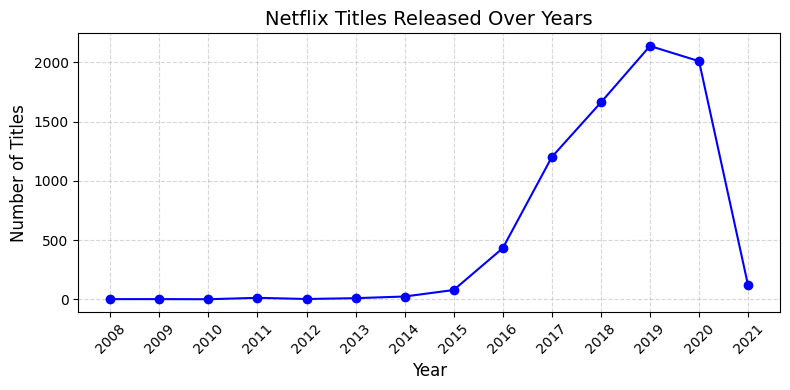

In [28]:
# Check if 'Release_Date' exists
if 'Release_Date' in df.columns:
    # Convert 'Release_Date' to datetime and drop invalid entries
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
    df_valid = df.dropna(subset=['Release_Date'])

    # Extract year and count titles per year
    df_valid['Year'] = df_valid['Release_Date'].dt.year
    yearly_count = df_valid['Year'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(yearly_count.index, yearly_count.values, marker='o', linestyle='-', color='blue')
    plt.title('Netflix Titles Released Over Years', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Titles', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(yearly_count.index, rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Release_Date' not found in the dataset.")

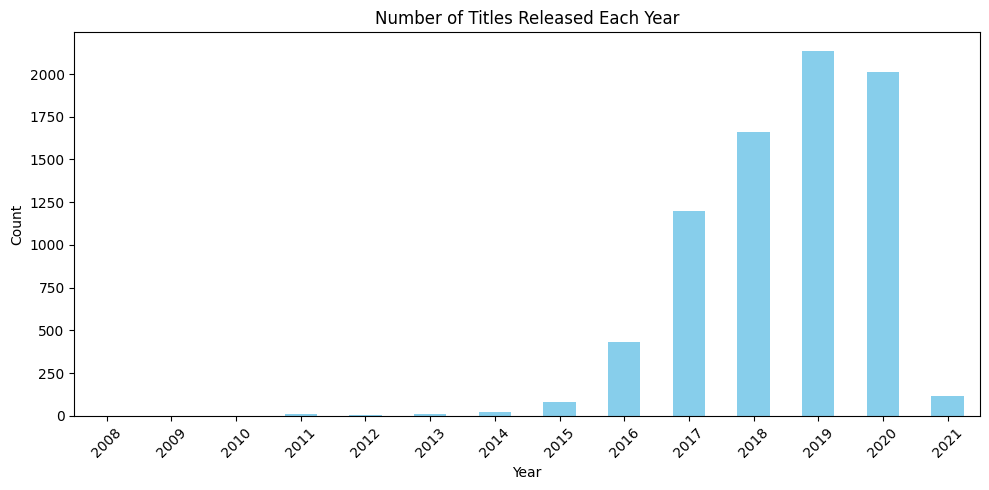

In [25]:
# Titles released per year (bar chart)
if 'Release_Date' in df.columns:
    # Convert to datetime and drop invalid dates
    df_valid = df.dropna(subset=['Release_Date']).copy()
    df_valid['Release_Year'] = pd.to_datetime(df_valid['Release_Date'], errors='coerce').dt.year
    df_valid = df_valid.dropna(subset=['Release_Year'])

    # Plotting
    plt.figure(figsize=(10, 5))
    df_valid['Release_Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Number of Titles Released Each Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Release_Date' not found in the dataset.")


/tmp/ipython-input-3181959506.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


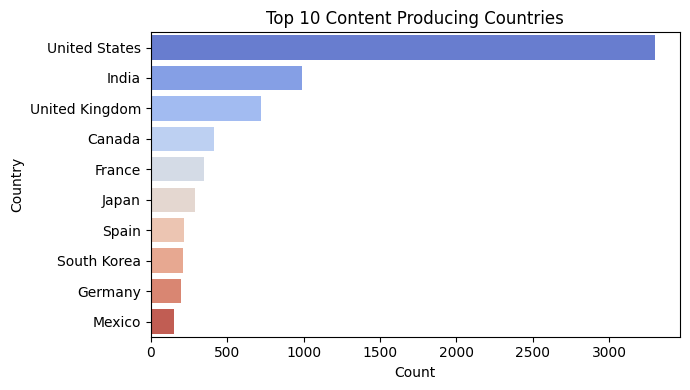

In [37]:
# Top 10 countries (compact bar chart)
if 'Country' in df.columns or 'country' in df.columns:
    country_column = 'Country' if 'Country' in df.columns else 'country'
    country_series = df[country_column].str.split(',').explode().str.strip()
    top_countries = country_series.value_counts().head(10)

    plt.figure(figsize=(7,4))  # Reduced size
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
    plt.title('Top 10 Content Producing Countries', fontsize=12)
    plt.xlabel('Count', fontsize=10)
    plt.ylabel('Country', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'country' not found in the dataset.")


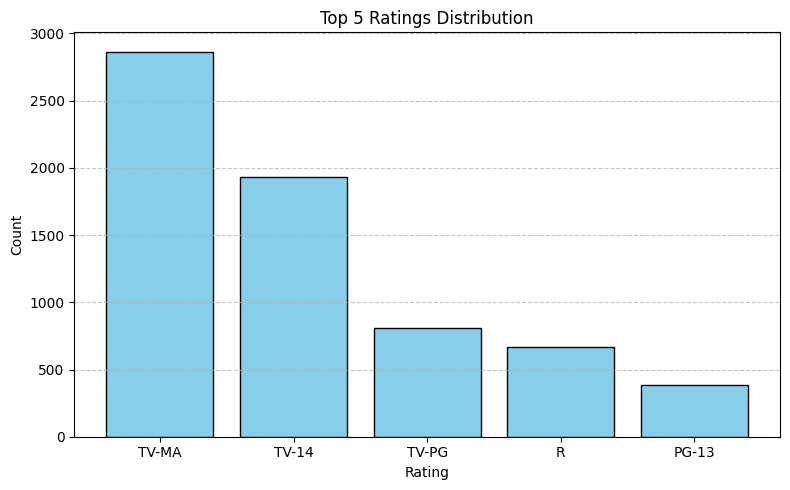

In [8]:
# Check and plot top 5 ratings
if 'rating' in df.columns:
    # Count ratings and select top 5
    top_ratings = df['rating'].value_counts().head(5)

    plt.figure(figsize=(8,5))
    plt.bar(top_ratings.index, top_ratings.values, color='skyblue', edgecolor='black')
    plt.title('Top 5 Ratings Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Prevent labels from collapsing
    plt.show()
else:
    print("Column 'rating' not found in the dataset.")

/tmp/ipython-input-2162779713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='mako')


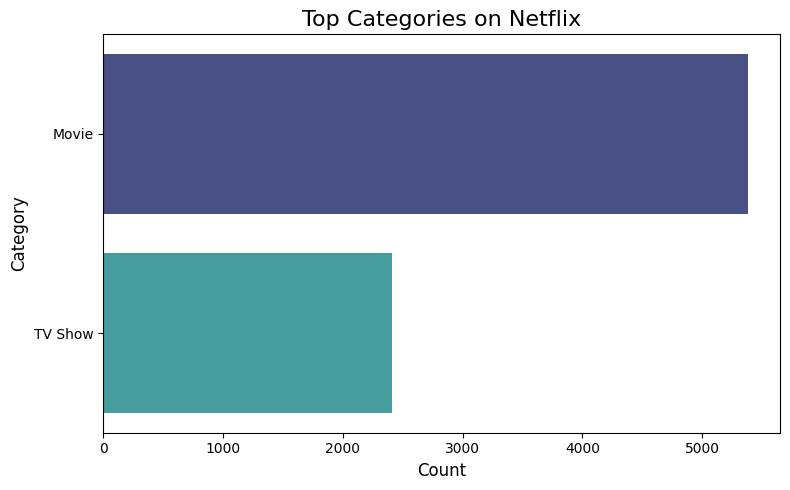

In [26]:
# Top categories (bar chart)
if 'Category' in df.columns:
    top_categories = df['Category'].value_counts().head(10)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='mako')
    plt.title('Top Categories on Netflix', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Category' not found in the dataset.")

/tmp/ipython-input-1520787749.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='crest')


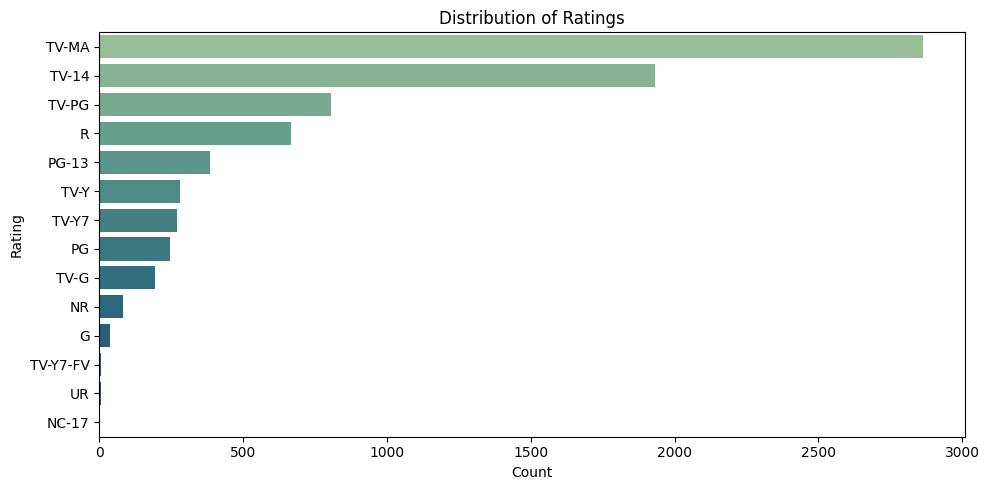

In [10]:
# Ratings distribution
if 'rating' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='crest')
    plt.title('Distribution of Ratings')
    plt.xlabel('Count')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.show()


In [32]:
# Duration analysis
if 'duration' in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(y='duration', data=df, order=df['duration'].value_counts().head(10).index, palette='viridis')
    plt.title('Top 10 Duration Categories')
    plt.xlabel('Count')
    plt.ylabel('Duration')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-4207376245.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')


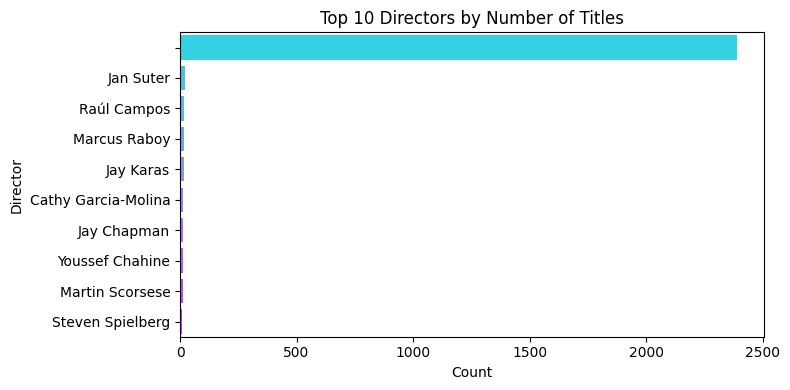

In [17]:
# Top 10 directors (wider and shorter)
if 'director' in df.columns:
    directors = df['director'].str.split(',').explode().str.strip()
    top_directors = directors.value_counts().head(10)

    plt.figure(figsize=(8,4))  # Wider and shorter
    sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')
    plt.title('Top 10 Directors by Number of Titles', fontsize=12)
    plt.xlabel('Count', fontsize=10)
    plt.ylabel('Director', fontsize=10)
    plt.tight_layout()
    plt.show()


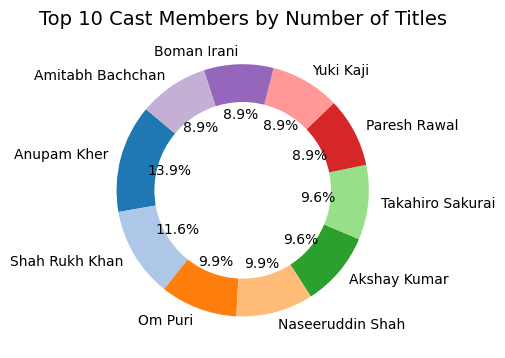

In [34]:
# Top 10 cast members
if 'Cast' in df.columns or 'cast' in df.columns:
    cast_column = 'Cast' if 'Cast' in df.columns else 'cast'
    casts = df[cast_column].str.split(',').explode().str.strip()
    top_casts = casts.value_counts().head(10)

    # Plot donut chart
    plt.figure(figsize=(5,5))
    plt.pie(top_casts.values, labels=top_casts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

    # Draw circle in the center to make it a donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title('Top 10 Cast Members by Number of Titles', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'cast' not found in the dataset.")